# numpyを使用した例

In [2]:
import cv2
import numpy as np
import os


w = np.genfromtxt('w.csv', delimiter=',')
w = w[1:, 4:]
area = w.astype(np.int64)
np.savetxt("area.csv", area, fmt='%.1f', delimiter=",")
for year in range(2005, 2018):
    data = []
    uvDir = "uv-scrape/"
    y = str(year)
    files = os.listdir(uvDir + y)
    dir = "result/" + y + "/"
    for f in files:
        st = uvDir + y + "/" + f
        img = cv2.imread(st)
        tmp = img[area[:, 0], area[:, 1]]
        uv = [[255, 255, 255],
              [255, 217, 217],
              [255, 203, 153],
              [190, 255, 255],
              [150, 250, 250],
              [0,   246, 250],
              [0,   200, 255],
              [0,   140, 255],
              [0,   90,  250],
              [0,   20,  255],
              [33,  0,   165],
              [91,  0,   181],
              [106, 0,   204],
              [204, 0,   204]]

        csv = np.zeros(142)
        for j in range(142):
            tako = []
            for i in range(14):
                tako.append(np.linalg.norm(tmp[j] - uv[i]))
                csv[j] = int(tako.index(min(tako)))
        data.append(csv)
        # data = data.astype(np.int64)
        np.savetxt(dir + f + ".csv", csv, fmt='%.1f', delimiter=",")
    np.savetxt("result/" + str(year) + ".csv", data, fmt='%.1f', delimiter=",")


# Pandasを使用した場合

In [26]:
import cv2
import pandas as pd
import numpy as np
import os


w = np.genfromtxt('w.csv', delimiter=',')
w = w[1:, 4:]
area = w.astype(np.int64)
np.savetxt("area.csv", area, fmt='%.1f', delimiter=",")
for year in range(2005, 2018):
    ret = pd.read_csv("w.csv")
    uvDir = "uv-scrape/"
    y = str(year)
    files = os.listdir(uvDir + y)
    dir = "result_pd/" + y + "/"
    for f in files:
        st = uvDir + y + "/" + f
        img = cv2.imread(st)
        tmp = img[area[:, 0], area[:, 1]]
        uv = [[255, 255, 255],
              [255, 217, 217],
              [255, 203, 153],
              [190, 255, 255],
              [150, 250, 250],
              [0,   246, 250],
              [0,   200, 255],
              [0,   140, 255],
              [0,   90,  250],
              [0,   20,  255],
              [33,  0,   165],
              [91,  0,   181],
              [106, 0,   204],
              [204, 0,   204]]

        csv = np.zeros(142)
        for j in range(142):
            tako = []
            for i in range(14):
                tako.append(np.linalg.norm(tmp[j] - uv[i]))
                csv[j] = int(tako.index(min(tako)))
        csv = csv.T
        name, ext = os.path.splitext(f)
        # print(pd.to_datetime(name))
        ret[pd.to_datetime(name)] = csv.T
    ret.to_csv("result_pd/" + y + '.csv' )
    print("Finish: " + y + ".csv")
print("Finish!!!!!!")


Finish: 2005.csv
Finish: 2006.csv
Finish: 2007.csv
Finish: 2008.csv
Finish: 2009.csv
Finish: 2010.csv
Finish: 2011.csv
Finish: 2012.csv
Finish: 2013.csv
Finish: 2014.csv
Finish: 2015.csv
Finish: 2016.csv
Finish: 2017.csv
Finish!!!!!!


# X,Yのピクセル地点に問題がないか確認

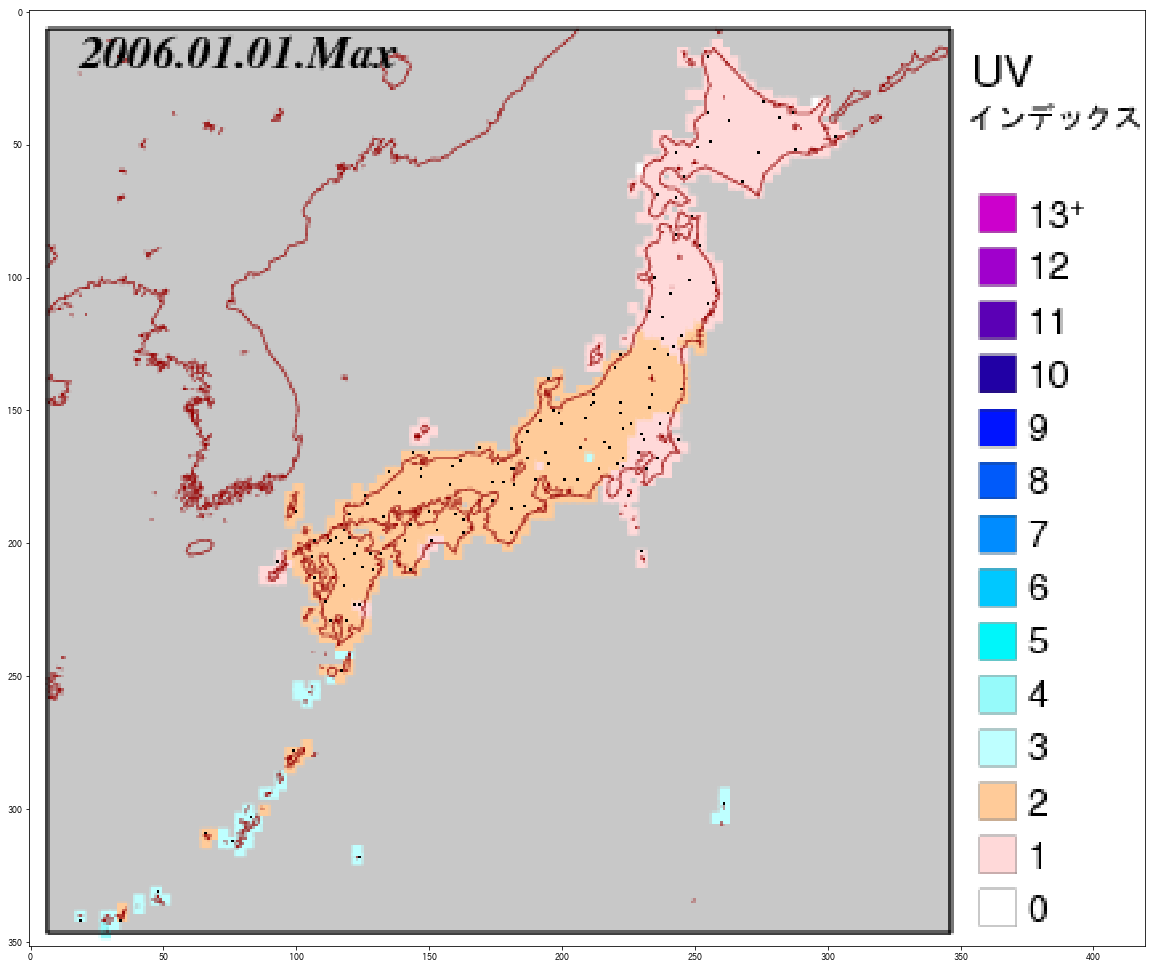

In [26]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

w = np.genfromtxt('w.csv', delimiter=',')
w = w[1:, 4:]
area = w.astype(np.int64)
img = cv2.imread("uv-scrape/2006/20060101.png")
for j in range(142):
    img.itemset((area[j,0], area[j,1], 0), 0)
    img.itemset((area[j,0], area[j,1], 1), 0)
    img.itemset((area[j,0], area[j,1], 2), 0)


plt.figure(figsize=(20, 20))
plt.imshow(img)